<a href="https://colab.research.google.com/github/yunustalip/Week---10--Alperen-Hoca--Mnist/blob/main/Week_10_Alperen_Hoca_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
from keras.utils.data_utils import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = x_train[5788]
cv2_imshow(img)
x_train[5788].shape

(28, 28)

In [ ]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [ ]:
x_train /=255

In [ ]:
x_test/=255

In [ ]:
y_test[789]

4

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [ ]:
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test[789]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       73856     
                                                      

In [ ]:
import time
batch_size=[32, 64, 128, 256, 512, 1024] #iteration = 20
epochs= 10
time_list = []
score_list = []
for batch in batch_size:

  start_time = time.time()

  history=model.fit(x_train, y_train,batch_size=batch, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
  score = model.evaluate(x_test,y_test)
  print("test loss:", score[0])
  print("test acc:", score[1])

  end_time = time.time()

  time_list.append(end_time-start_time)
  score_list.append(score[1])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0172 - accuracy: 0.9972 - val_loss: 0.0622 - val_accuracy: 0.9915
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 0.0621 - val_accuracy: 0.9913
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.0444 - val_accuracy: 0.9933
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0523 - val_accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.0511 - val_accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 0.0587 - val_accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0688 - val_accura

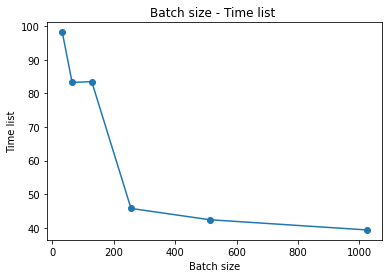

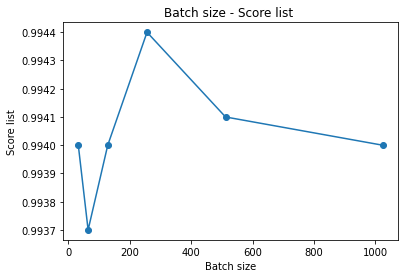

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.title("Batch size - Time list ")
plt.xlabel('Batch size')
plt.ylabel('Time list')

plt.scatter(batch_size,time_list)
plt.plot(batch_size,time_list)
plt.figure()
plt.title("Batch size - Score list ")
plt.xlabel('Batch size')
plt.ylabel('Score list')
plt.scatter(batch_size,score_list)
plt.plot(batch_size,score_list)